In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from scipy import stats
import pprint
import matplotlib.pyplot as plt

### Premier League Data
For our final project, we sought to find patterns, run analysis, and investigate elements of the Premier League. Sports Statistics website had a number of years available. By inspecting the website, we were able to find the link for the data. So we proceeded to scrape 15 years worth of Premier League Data. 

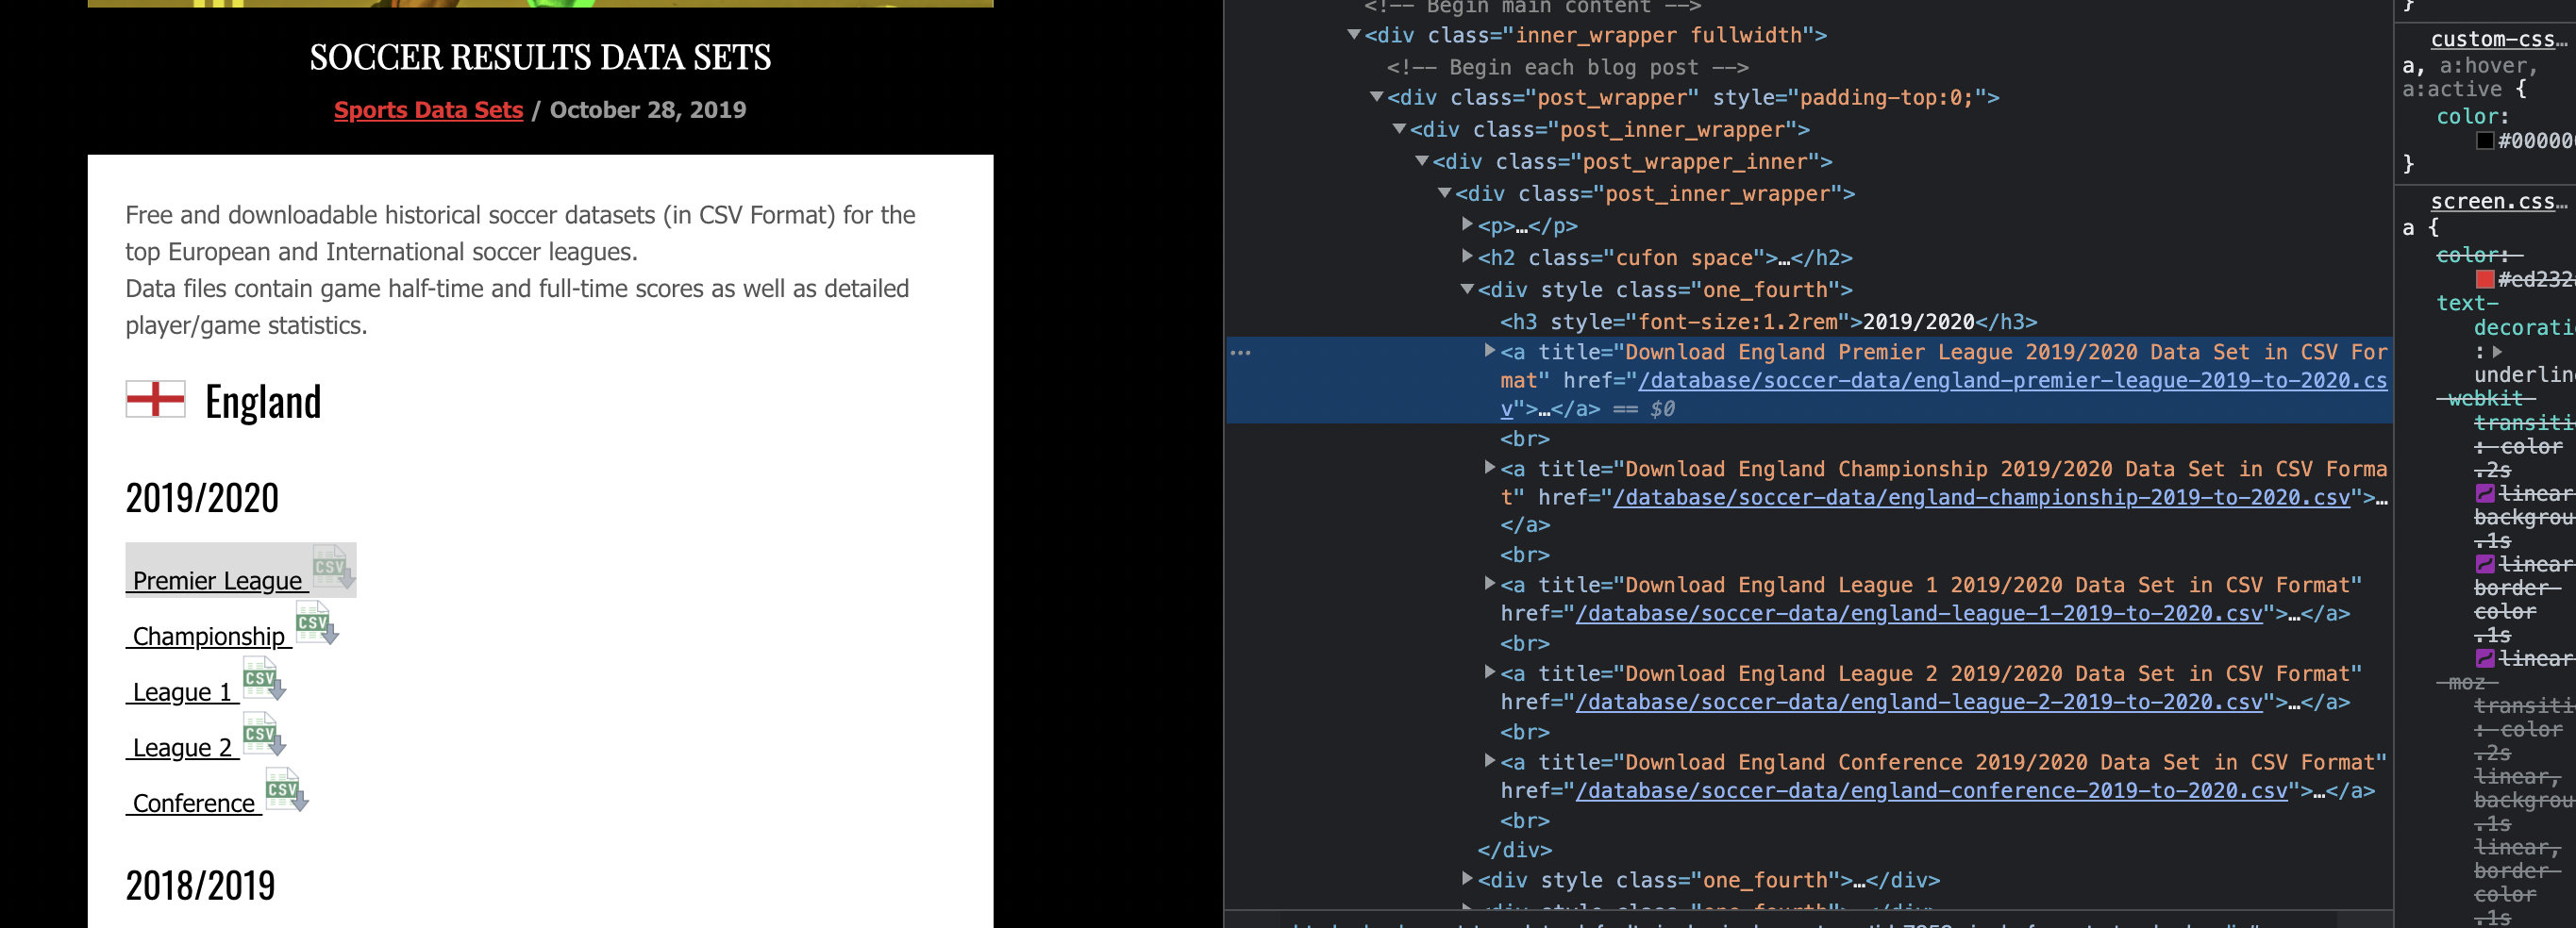

#### Here we iteratively loop through the 15 datasets, combining them with our elements of interest

In [167]:
soccer = pd.read_csv("https://sports-statistics.com/database/soccer-data/england-premier-league-2005-to-2006.csv")
for i in range(2006,2020):
    soccer = soccer.loc[:,'Div':'AR']
    start = str(i)
    stop = str(i+1)
    link = "https://sports-statistics.com/database/soccer-data/england-premier-league-"+start+"-to-"+stop+".csv"
    print("Downloading data from ", link)
    df = pd.read_csv(link)
    df = df.loc[:,'Div':'AR']
    current = soccer
    soccer = pd.concat([current,df], axis=0)
    
    

soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Time
0,E0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,NaN
1,E0,13/08/05,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,NaN
2,E0,13/08/05,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,NaN
3,E0,13/08/05,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,01/01/2020,Watford,Wolves,2.0,1.0,H,1.0,0.0,H,...,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0,15:00
204,E0,01/01/2020,Man City,Everton,2.0,1.0,H,0.0,0.0,D,...,2.0,11.0,11.0,3.0,6.0,0.0,4.0,0.0,0.0,17:30
205,E0,01/01/2020,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,...,3.0,12.0,9.0,2.0,5.0,5.0,0.0,0.0,0.0,17:30
206,E0,01/01/2020,West Ham,Bournemouth,4.0,0.0,H,3.0,0.0,H,...,2.0,3.0,12.0,9.0,2.0,1.0,2.0,0.0,0.0,17:30


In [168]:
soccer_copy = soccer.copy()


In [169]:
#run when wanting original without having to re-run download
soccer = soccer_copy

In [170]:
soccer.isna().sum()

Div            1
Date           1
HomeTeam       1
AwayTeam       1
FTHG           1
FTAG           1
FTR            1
HTHG           1
HTAG           1
HTR            1
Referee        1
HS             1
AS             1
HST            1
AST            1
HF             1
AF             1
HC             1
AC             1
HY             1
AY             1
HR             1
AR             1
Time        5321
dtype: int64

### Looks like there is a row missing, along with a bunch of Time values, so lets drop the missing rown and the Time column.

In [171]:
soccer.drop(['Time'], axis = 1, inplace = True)
soccer.dropna(how = 'all', inplace = True)
soccer.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [172]:
soccer.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Referee      object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

### We should have Date be a Date object

In [173]:
soccer['Date'] = pd.to_datetime(soccer['Date'])
soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,2.0,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,7.0,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,8.0,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,2.0,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,2020-01-01,Watford,Wolves,2.0,1.0,H,1.0,0.0,H,...,3.0,4.0,12.0,6.0,4.0,7.0,3.0,1.0,1.0,0.0
204,E0,2020-01-01,Man City,Everton,2.0,1.0,H,0.0,0.0,D,...,7.0,2.0,11.0,11.0,3.0,6.0,0.0,4.0,0.0,0.0
205,E0,2020-01-01,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,...,4.0,3.0,12.0,9.0,2.0,5.0,5.0,0.0,0.0,0.0
206,E0,2020-01-01,West Ham,Bournemouth,4.0,0.0,H,3.0,0.0,H,...,7.0,2.0,3.0,12.0,9.0,2.0,1.0,2.0,0.0,0.0


### Next, lets make dummy collumns for the FTR (full time result) and HTR (half time result) columns. 

In [174]:
soccer = pd.get_dummies(soccer, columns = ['FTR','HTR'])
soccer

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,Referee,HS,...,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,2.0,2.0,M Riley,3.0,...,0.0,2.0,0.0,0.0,0,1,0,0,1,0
1,E0,2005-08-13,Everton,Man United,0.0,2.0,0.0,1.0,G Poll,10.0,...,3.0,1.0,0.0,0.0,1,0,0,1,0,0
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,0.0,0.0,R Styles,15.0,...,1.0,2.0,0.0,0.0,0,1,0,0,1,0
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,0.0,0.0,C Foy,15.0,...,2.0,3.0,0.0,0.0,0,1,0,0,1,0
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,0.0,0.0,M Halsey,4.0,...,2.0,3.0,1.0,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,2020-01-01,Watford,Wolves,2.0,1.0,1.0,0.0,A Madley,9.0,...,3.0,1.0,1.0,0.0,0,0,1,0,0,1
204,E0,2020-01-01,Man City,Everton,2.0,1.0,0.0,0.0,A Marriner,16.0,...,0.0,4.0,0.0,0.0,0,0,1,0,1,0
205,E0,2020-01-01,Norwich,Crystal Palace,1.0,1.0,1.0,0.0,J Moss,15.0,...,5.0,0.0,0.0,0.0,0,1,0,0,0,1
206,E0,2020-01-01,West Ham,Bournemouth,4.0,0.0,3.0,0.0,G Scott,14.0,...,1.0,2.0,0.0,0.0,0,0,1,0,0,1


Our data is in a cleaned format. Now we can begin some analysis

# Referee Data
One element we plan to investigate is referee bias. There is a lot of data available, but many of them have relatively small sample sizes. Plus, the data is not formatted in a way that makes it easy to check stats by referee. In the next few steps, we will reshape and filter our data in three ways:
- Group the data by referee and home team so we can then perfrom some simple calculations based on overall games
- We will then filter this data to exclude Referees/Teams that do not have a large enough sample size (less than 10 games)
- We will also group the data by teams to get their average stats and compare that with Referee specific stats per team.

The function below takes in a team type (HomeTeam or AwayTeam) and groups our soccer data frame by referee and team. This helps us get the overall information for every referee and for each team Home and Away team they have refereed for.

In [175]:
def create_ref_groups(team_type):
    types = {'HomeTeam': ['FTR_H','FTR_A','FTR_D','HY','HR'], 'AwayTeam': ['FTR_A','FTR_H','FTR_D','AY','AR']}
    wins = types[team_type][0]
    losses = types[team_type][1]
    draws = types[team_type][2]
    yellow = types[team_type][3]
    red = types[team_type][4]
    grouped = soccer.groupby(['Referee',team_type])
    ref_game_dat = grouped[wins].agg([('Team_Wins','sum')])
    ref_game_dat['Team_Losses'] = grouped[losses].agg(['sum'])['sum']
    ref_game_dat['Team_Draw'] = grouped[draws].agg(['sum'])['sum']
    ref_game_dat['Total_Games'] = grouped[wins].agg(['count'])
    ref_game_dat['Win_Per'] = round(ref_game_dat['Team_Wins']/ref_game_dat['Total_Games']*100,2)
    ref_game_dat['Yellow_Card_Avg'] = grouped[yellow].agg(['mean'])
    ref_game_dat['Red_Card_Avg'] = grouped[red].agg(['mean'])
    return ref_game_dat
    

In [176]:
away_data = create_ref_groups('AwayTeam')
away_filtered = away_data[away_data['Total_Games']>=15]
away_filtered

Team_Wins  Team_Losses  Team_Draw  Total_Games  \
Referee    AwayTeam                                                     
A Marriner Chelsea            11            5          5           21   
           Everton             5            9          5           19   
           Liverpool          10            8          8           26   
           Man City           12            9          6           27   
           Man United         10            8          2           20   
...                          ...          ...        ...          ...   
P Dowd     Chelsea             8            5          3           16   
           Liverpool           6            8          3           17   
           Man City            6            5          4           15   
           Newcastle           3           10          5           18   
           Sunderland          3           14          4           21   

                       Win_Per  Yellow_Card_Avg  Red_Card_Avg  
Referee    AwayTeam                                            
A Marriner Chelsea       52.38         1.761905      0.095238  
           Everton       26.32         1.684211      0.000000  
           Liverpool     38.46         1.884615      0.038462  
           Man City      44.44         1.851852      0.037037  
           Man United    50.00         1.800000      0.150000  
...                        ...              ...           ...  
P Dowd     Chelsea       50.00         2.000000      0.250000  
           Liverpool     35.29         2.000000      0.117647  
           Man City      40.00         2.266667      0.066667  
           Newcastle     16.67         1.888889      0.166667  
           Sunderland    14.29         2.428571      0.095238  

[66 rows x 7 columns]

In [177]:
home_data = create_ref_groups('HomeTeam')
home_filtered = home_data[home_data['Total_Games']>=15]
home_filtered

Team_Wins  Team_Losses  Team_Draw  Total_Games  Win_Per  \
Referee    HomeTeam                                                             
A Marriner Arsenal           13            5          3           21    61.90   
           Chelsea            8            3          4           15    53.33   
           Everton           10            4          6           20    50.00   
           Liverpool         11            1          7           19    57.89   
           Man City          14            2          1           17    82.35   
...                         ...          ...        ...          ...      ...   
M Oliver   Tottenham         11            2          2           15    73.33   
P Dowd     Bolton             6            6          5           17    35.29   
           Everton            8            2          7           17    47.06   
           Liverpool         13            0          5           18    72.22   
           Tottenham         12            4          0           16    75.00   

                      Yellow_Card_Avg  Red_Card_Avg  
Referee    HomeTeam                                  
A Marriner Arsenal           1.238095      0.047619  
           Chelsea           1.133333      0.000000  
           Everton           1.550000      0.000000  
           Liverpool         1.105263      0.052632  
           Man City          1.470588      0.058824  
...                               ...           ...  
M Oliver   Tottenham         1.800000      0.000000  
P Dowd     Bolton            1.352941      0.058824  
           Everton           1.352941      0.058824  
           Liverpool         1.388889      0.055556  
           Tottenham         1.250000      0.062500  

[61 rows x 7 columns]

Similar to the function above, this function takes in a team type. However, this time we only group data by team, getting their overall results and stats. 

In [178]:
def create_team_groups(team_type):
    types = {'HomeTeam': ['FTR_H','FTR_A','FTR_D','HY','HR'], 'AwayTeam': ['FTR_A','FTR_H','FTR_D','AY','AR']}
    wins = types[team_type][0]
    losses = types[team_type][1]
    draws = types[team_type][2]
    yellow = types[team_type][3]
    red = types[team_type][4]
    grouped = soccer.groupby([team_type])
    team_data = grouped[wins].agg([('Wins','sum')])
    team_data['Losses'] = grouped[losses].agg(['sum'])['sum']
    team_data['Draws'] = grouped[draws].agg(['sum'])['sum']
    team_data['Total_Games'] = grouped[wins].agg(['count'])
    team_data['Win_Percentage'] = round(team_data['Wins']/team_data['Total_Games']*100,2)
    team_data['Loss_Percentage'] = round(team_data['Losses']/team_data['Total_Games']*100,2)
    team_data['Yellow_Card_Count'] = grouped[yellow].agg(['sum'])
    team_data['Red_Card_Count'] = grouped[red].agg(['sum'])
    team_data['Yellow_Card_Avg'] = grouped[yellow].agg(['mean'])
    team_data['Red_Card_Avg'] = grouped[red].agg(['mean'])
    return team_data


In [179]:
away_teams = create_team_groups('AwayTeam')
away_teams 

,Wins,Losses,Draws,Total_Games,Win_Percentage,Loss_Percentage,Yellow_Card_Count,Red_Card_Count,Yellow_Card_Avg,Red_Card_Avg
AwayTeam,,,,,,,,,,
Arsenal,118,88,70,276,42.75,31.88,472.0,29.0,1.710145,0.105072
Aston Villa,57,100,63,220,25.91,45.45,429.0,16.0,1.950000,0.072727
Birmingham,11,48,17,76,14.47,63.16,140.0,7.0,1.842105,0.092105
Blackburn,32,70,31,133,24.06,52.63,273.0,18.0,2.052632,0.135338
Blackpool,5,10,4,19,26.32,52.63,25.0,2.0,1.315789,0.105263
Bolton,29,77,27,133,21.80,57.89,287.0,14.0,2.157895,0.105263
Bournemouth,21,48,18,87,24.14,55.17,126.0,3.0,1.448276,0.034483
Brighton,7,30,11,48,14.58,62.50,64.0,4.0,1.333333,0.083333
Burnley,18,62,25,105,17.14,59.05,200.0,7.0,1.904762,0.066667


In [180]:
home_teams = create_team_groups('HomeTeam')
home_teams 

,Wins,Losses,Draws,Total_Games,Win_Percentage,Loss_Percentage,Yellow_Card_Count,Red_Card_Count,Yellow_Card_Avg,Red_Card_Avg
HomeTeam,,,,,,,,,,
Arsenal,184,33,60,277,66.43,11.91,401.0,16.0,1.447653,0.057762
Aston Villa,72,78,69,219,32.88,35.62,325.0,13.0,1.484018,0.059361
Birmingham,26,20,30,76,34.21,26.32,113.0,7.0,1.486842,0.092105
Blackburn,59,40,34,133,44.36,30.08,226.0,16.0,1.699248,0.120301
Blackpool,5,9,5,19,26.32,47.37,22.0,0.0,1.157895,0.000000
Bolton,54,44,35,133,40.60,33.08,189.0,9.0,1.421053,0.067669
Bournemouth,31,32,23,86,36.05,37.21,135.0,4.0,1.569767,0.046512
Brighton,17,15,17,49,34.69,30.61,80.0,4.0,1.632653,0.081633
Burnley,40,44,22,106,37.74,41.51,163.0,0.0,1.537736,0.000000


### Analysis
- Now that the data is properly formatted and cleaned, we can begin our analysis. We will primarily be analyzing referee bias by looking at Red Cards and Yellow Cards, since referees have decision over these factors.
- We begin analysis by comparing a teams overall card average to their card average per referee.
- If a team's card average per referee is two standard deviations from the teams overall card average we will "suspect" that referee for bias toward that team. 
- Once we've selected our suspected referees, we will then run a t-test between the games where the referee reffed for the Home Team and then take a sample of the same size from the rest of the Home Team's games and compare the card data. This will be run 100 times and we will count the number of times the p-value is less than 0.05. 

In [181]:
def print_bias(bdict):
    for key in bdict.keys():
        teams = bdict[key]
        if len(teams) > 1:
            last = teams.pop()
            team_names = ', '.join(teams)
            print(f"Referee {key} is suspected of bias towards {team_names} and {last}")
        else: 
            print(f"Referee {key} is suspected of bias towards {teams[0]} times")
    

In [182]:
def print_results(results, referees, teamData, threshold, arg):
    for key in results.keys():
        for team in results[key]:
            avg = teamData.loc[team][arg]
            p_counts = results[key][team][2]
            if p_counts >= threshold:
                print(f"Referee {key}'s bias towards {team} was signifcant {p_counts} out of {results[key][team][1]}")
    

In [183]:

pp = pprint.PrettyPrinter()


#Checks the p-value between each ref and their suspected bias teams
def check_p(cat, bdict, referees, run):
    
    pval_d = defaultdict(lambda: defaultdict(lambda: [0,0,0]))
    b_refs = bdict.keys()
    for i in range(run):
        for b_ref in b_refs:
            r_teams = bdict[b_ref]
            for r_team in r_teams:
                n = int(referees.loc[b_ref].loc[r_team]['Total_Games'])
                team_total = soccer[soccer['HomeTeam']==r_team]
                tot_no_ref = team_total[team_total['Referee'] != b_ref]
                team_test = tot_no_ref.sample(n)[cat]
                ref_total = soccer[soccer['HomeTeam']== r_team]
                ref_test = ref_total[ref_total['Referee'] == b_ref][cat]
                rv = np.var(ref_test)
                tv = np.var(team_test)
                e_var = False
                if rv != 0 and tv != 0:
                    e_var = rv/tv < 4 or tv/rv < 4
                res = stats.ttest_ind(ref_test, team_test, equal_var=e_var)
                if not np.isnan(res[1]):
                    if res[1] < 0.05:
                        pval_d[b_ref][r_team][2]+=1
                    current = pval_d[b_ref][r_team]
                    pval_d[b_ref][r_team][1]+=1
                    pval_d[b_ref][r_team][0] = (current[0]+res[1])/(current[1])

    return pval_d


#Selects the refs and teams that are suspected of bias (means are different by 2 standard deviances)
def find_bias(card,team, threshold):
    
    
    types = {'Yellow': {'Away': ['Yellow_Card_Avg','AY'], 
                        'Home': ['Yellow_Card_Avg','HY'],
                        'title': 'Average Yellow Cards'},
             'Red': {'Away': ['Red_Card_Avg','AR'], 
                     'Home': ['Red_Card_Avg','HR'],
                     'title': 'Average Yellow Cards'
                    }}
    
    data_source = {'Home': [home_filtered, home_teams],
                  'Away': [away_filtered, away_teams]}
    
    referees = data_source[team][0]
    teamData = data_source[team][1]
    arg = types[card][team][0]
    cat = types[card][team][1]
    
    refs = set(referees.reset_index()['Referee'])
    
    bias_dict = defaultdict(lambda: [])
    for ref in refs:  
        ref_dat = referees.loc[ref]
        teams = ref_dat.index.tolist()
        for team in teams:
            team_avg = teamData.loc[team][arg]
            ref_avg = ref_dat.loc[team][arg]
            sd = np.std(soccer[soccer['HomeTeam'] == team][cat])
            if abs(ref_avg-team_avg)*2 > sd:
                bias_dict[ref].append(team)
                
    print_bias(bias_dict)
    bias = check_p(cat,bias_dict,referees,100)
    print()
    print("Investigating Bias")
    print_results(bias, referees, teamData, threshold, arg) 
    
    
    for ref in bias.keys():  
        ref_dat = referees.loc[ref]
        teams = list(bias[ref].keys())
        dic = {'Team': [], 'Type': [], 'Avg': []}
        sns_dat = pd.DataFrame(dic)

        for team in teams:
            if bias[ref][team][2]>= threshold:
                team_avg = teamData.loc[team][arg]
                ref_avg = ref_dat.loc[team][arg]
                sns_dat.loc[len(sns_dat.index)] = [team,'actual',team_avg] 
                sns_dat.loc[len(sns_dat.index)] = [team,'ref',ref_avg]
        
        if not sns_dat.empty:
            g = sns.catplot(data=sns_dat, kind="bar",x="Team", y="Avg", hue="Type", aspect = 4)
            g.set_axis_labels("", types[card]['title'])
            g.legend.set_title(ref)
            

Referee M Atkinson is suspected of bias towards Man City times
Referee C Foy is suspected of bias towards Arsenal times
Referee M Jones is suspected of bias towards Man United times
Referee M Dean is suspected of bias towards Arsenal times
Referee H Webb is suspected of bias towards Man United times

Investigating Bias
Referee M Atkinson's bias towards Man City was signifcant 42 out of 100
Referee C Foy's bias towards Arsenal was signifcant 90 out of 100
Referee M Jones's bias towards Man United was signifcant 36 out of 100
Referee M Dean's bias towards Arsenal was signifcant 32 out of 100
Referee H Webb's bias towards Man United was signifcant 41 out of 100


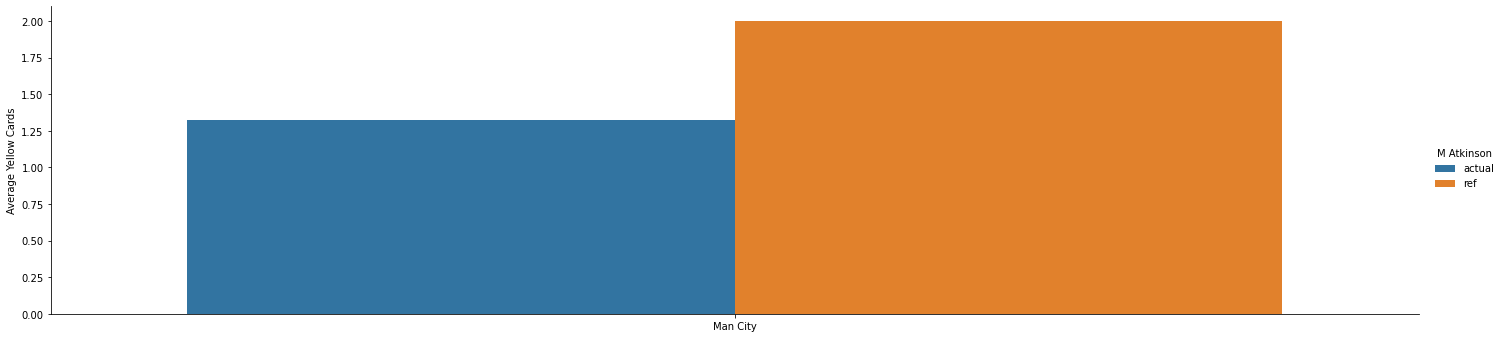

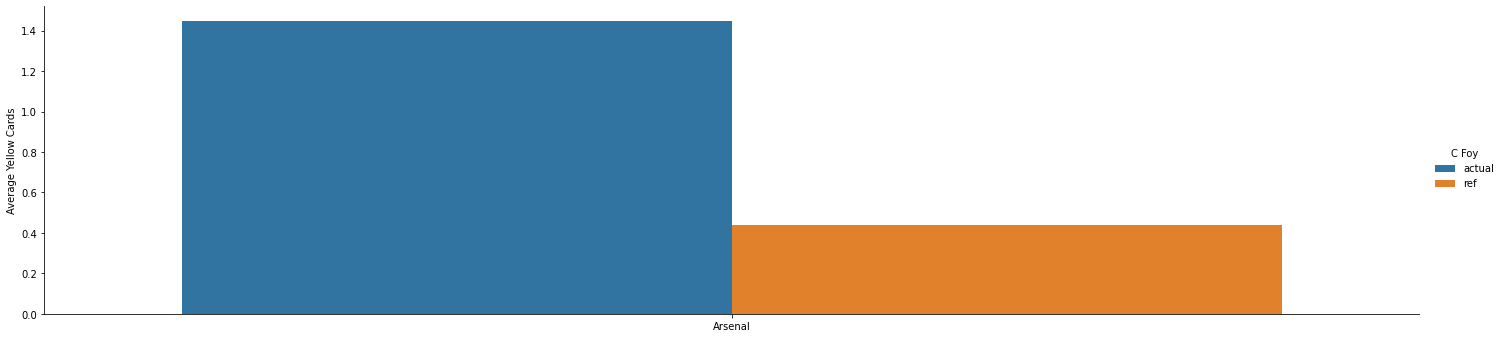

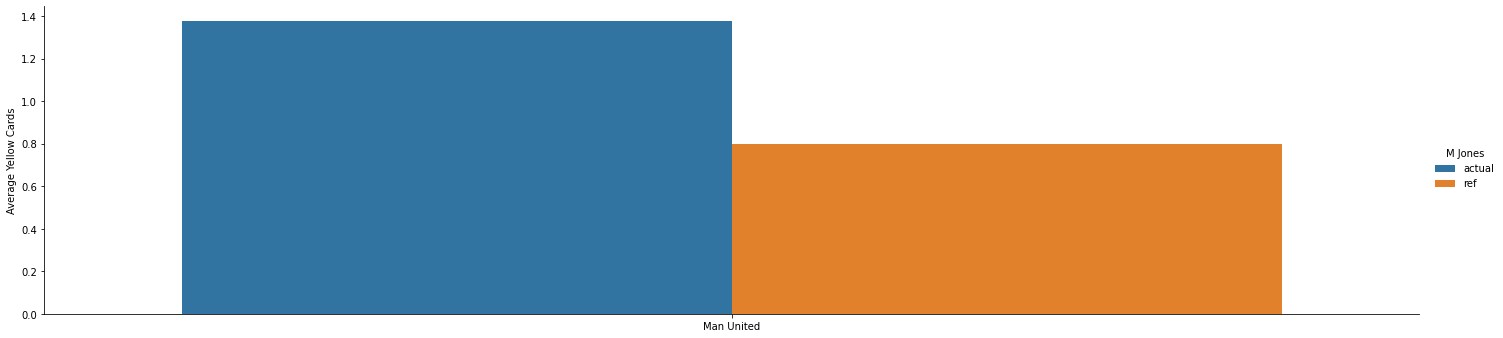

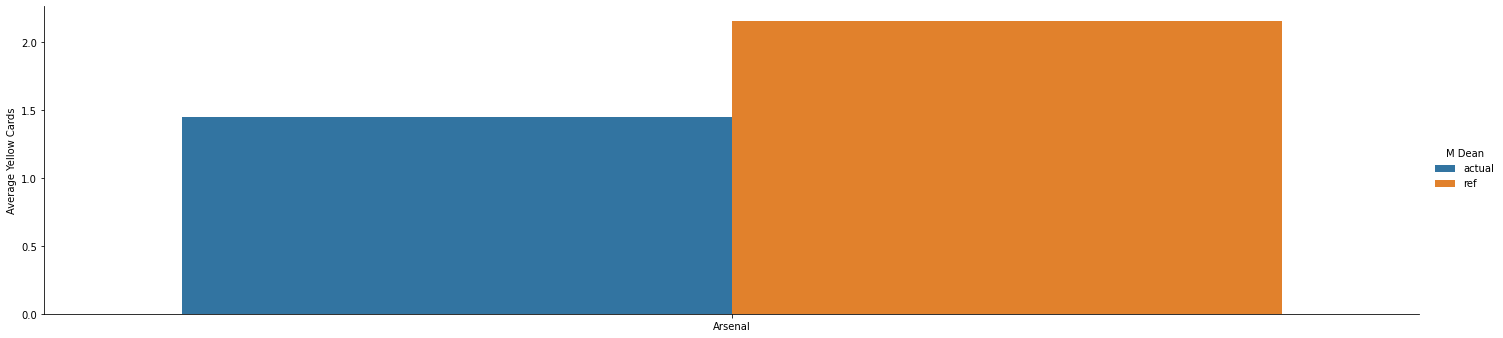

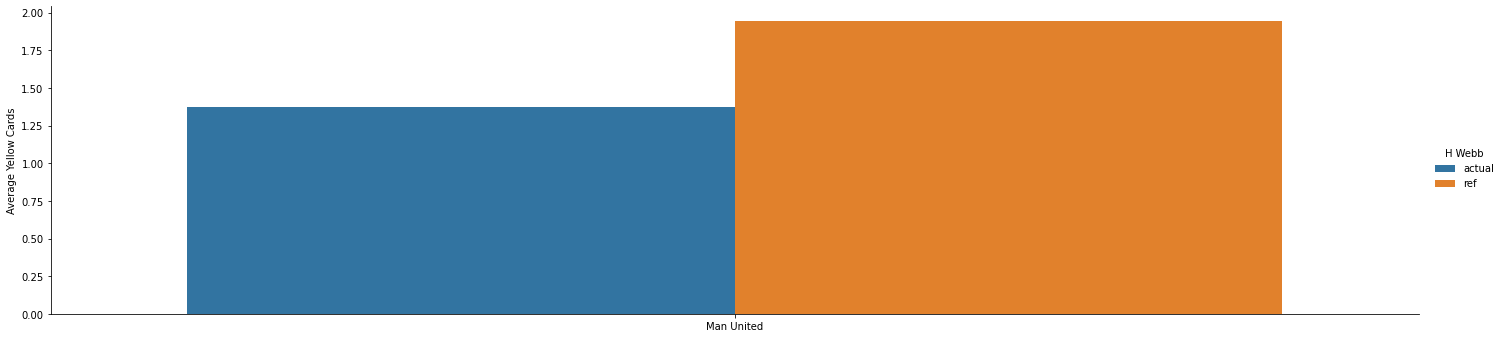

In [184]:
find_bias('Yellow','Home', 30)

Referee M Atkinson is suspected of bias towards Liverpool times
Referee A Marriner is suspected of bias towards Newcastle times

Investigating Bias
Referee M Atkinson's bias towards Liverpool was signifcant 47 out of 100


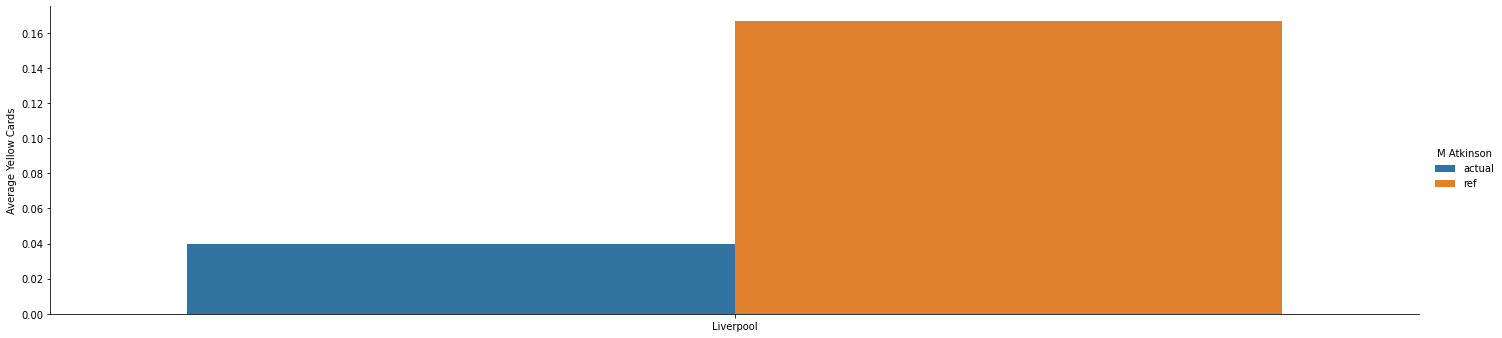

In [185]:
find_bias('Red','Home', 30)

In [186]:
find_bias('Yellow','Away',30)

Referee M Halsey is suspected of bias towards Aston Villa times
Referee H Webb is suspected of bias towards Arsenal and Chelsea

Investigating Bias


In [187]:
find_bias('Red','Away',30)

Referee P Dowd is suspected of bias towards Chelsea times

Investigating Bias


### Continued Analysis
Next we have to show that these biases in fouls actually inpact game results. To show this, we will take a look at the rate of fouls compared to win percentage. 

In [188]:
def plot_relation(team_type, card):
    types = {'Yellow': {'Away': 'Yellow_Card_Avg',
                        'Home': 'Yellow_Card_Avg',
                        'title': 'Average Yellow Cards'},
             'Red': {'Away': 'Red_Card_Avg', 
                     'Home': 'Red_Card_Avg',
                     'title': 'Average Yellow Cards'
                    }}
    
    data_source = {'Home': home_teams,
                  'Away': away_teams}
    
    plt.rcParams['figure.figsize'] = [20, 10]
    sorted_df = data_source[team_type].sort_values(by = [types[card][team_type]])
    sns.regplot(x = sorted_df[types[card][team_type]], y = sorted_df['Loss_Percentage'], label = 'Losses')
    sns.regplot(x = sorted_df[types[card][team_type]], y = sorted_df['Win_Percentage'], label = 'Wins')
    plt.xlabel(types[card]['title'])
    plt.ylabel('Percentage')
    plt.legend(title='Win/Loss vs Fouls', loc='upper left')

First lets look at Home Teams and Yellow Cards

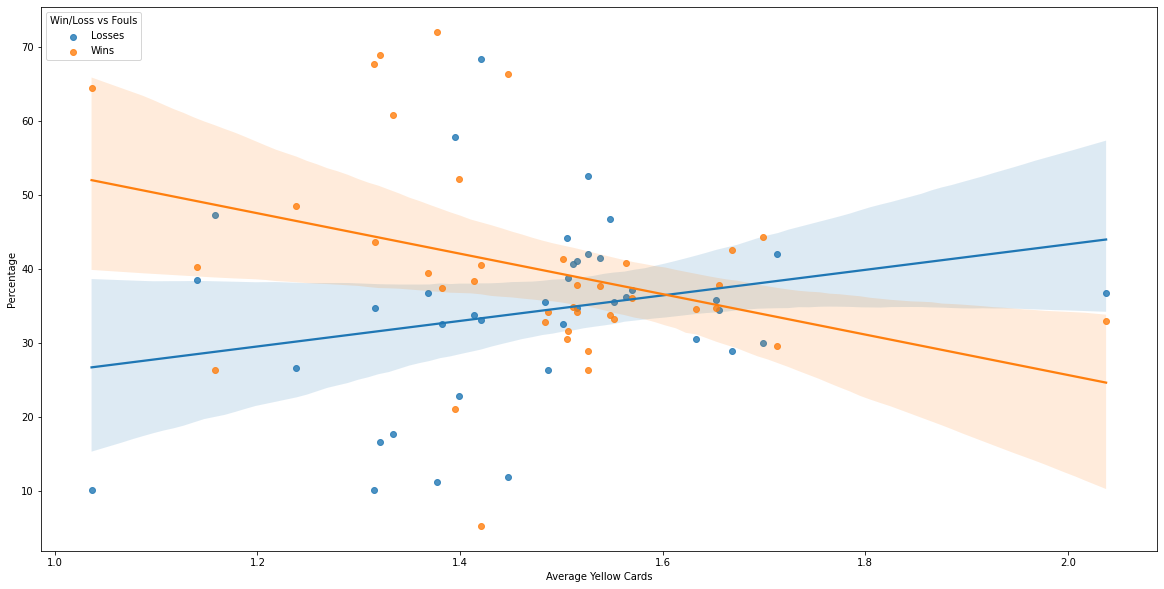

In [189]:
plot_relation('Home','Yellow')

Now lets look at Away Teams

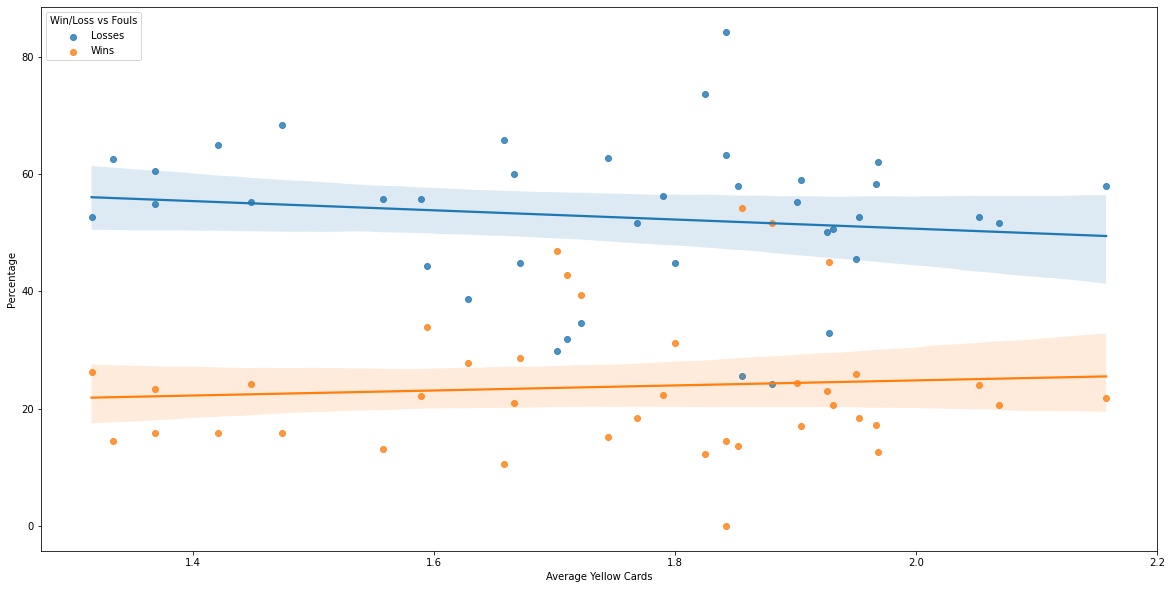

In [190]:
plot_relation('Away','Yellow')

Now Red cards for Home Teams

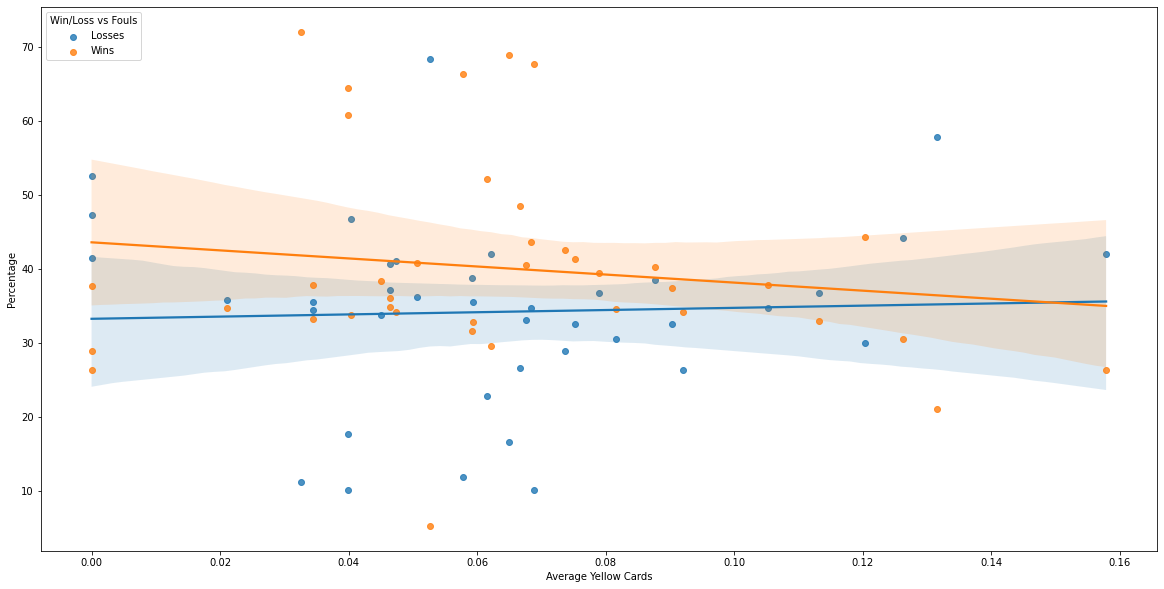

In [191]:
plot_relation('Home','Red')

And now for Away Teams

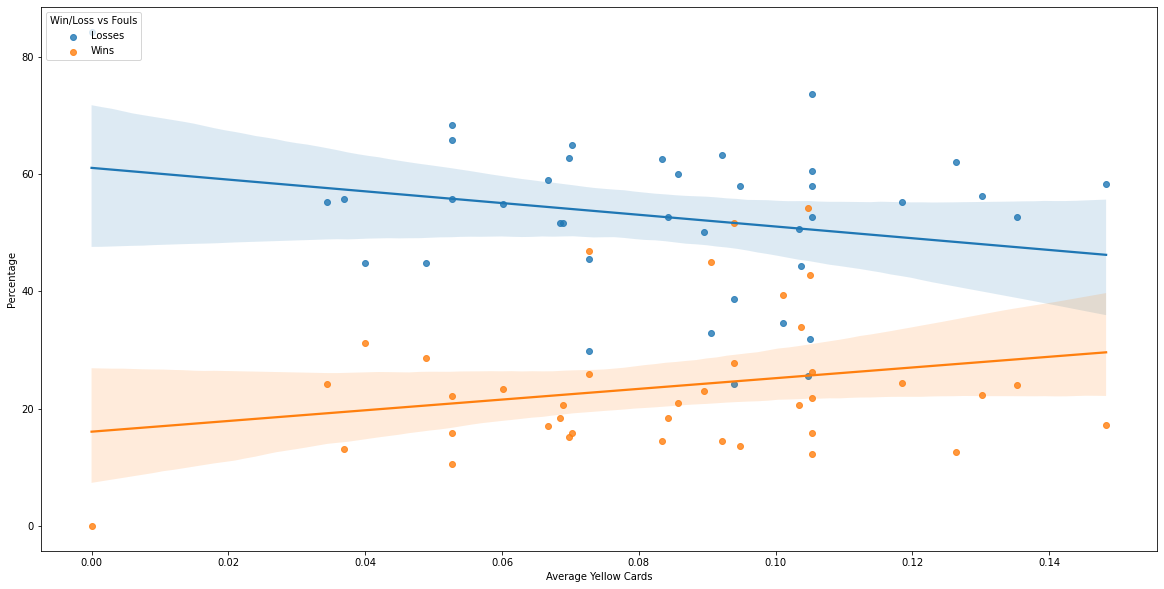

In [192]:
plot_relation('Away','Red')

We can see that when at home, when yellow card average increases, win percentage decreases and loss percentage increases. This means that Yellow card average affects game play, which in turn means that referee biases towards yellow cards could affect the teams outcomes. 

Interestingly enough, we can see that yellow card average has very little affect on win/loss percentage. The referees were also found to have no bias toward away teams with yellow cards. Red cards seemed to have a much less impactfull effect on Win/Loss percentage, and from above, we only see one signifcantly bias referee with red card average. And once again, we see very little effect on away team results, and see litte to no bias from referees towards away teams. 

## Conclusion of Referee Bias
While we can't use this to completely claim referee bias, we can clearly see that the average yellow cards given to certain teams by certain referees (M Atkinson, C Foy, M Jones, M Dean, and H Webb) are greater on average than the teams receive. 

Furthermore, we were able to clearly assess that having an increased average of yellow cards per game, decreases the win percentage of teams. Thus, we can imply that the referees bias affects the teams win percentage. 